In [1]:
import pandas as pd

In [16]:
# 치킨집 수 데이터 파일
df = pd.read_excel('./data/chicken.xlsx')
df


# 인구수 데이터 파일 
#population = pd.read_excel('./population.xlsx')
population = pd.read_excel('./population.xlsx', thousands = ',') # 불러올떄 숫자, --> 숫자로 인식해줘

population

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시군구정리
0,서울특별시 (1100000000),9765623,4263868,2.29,4773899,4991724,0.96,서울특별시
1,서울특별시 종로구 (1111000000),153065,73735,2.08,74825,78240,0.96,서울특별시 종로구
2,서울특별시 중구 (1114000000),125725,61502,2.04,61947,63778,0.97,서울특별시 중구
3,서울특별시 용산구 (1117000000),228999,108974,2.10,110640,118359,0.93,서울특별시 용산구
4,서울특별시 성동구 (1120000000),308221,137209,2.25,151359,156862,0.96,서울특별시 성동구
...,...,...,...,...,...,...,...,...
273,경상남도 거창군 (4888000000),62455,28814,2.17,30340,32115,0.94,경상남도 거창군
274,경상남도 합천군 (4889000000),45916,24076,1.91,22001,23915,0.92,경상남도 합천군
275,제주특별자치도 (5000000000),667191,287104,2.32,335719,331472,1.01,제주특별자치도
276,제주특별자치도 제주시 (5011000000),485946,204621,2.37,243974,241972,1.01,제주특별자치도 제주시


In [17]:
population.head(2)

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시군구정리
0,서울특별시 (1100000000),9765623,4263868,2.29,4773899,4991724,0.96,서울특별시
1,서울특별시 종로구 (1111000000),153065,73735,2.08,74825,78240,0.96,서울특별시 종로구


In [18]:
# df 광역시 + 시군구 컬럼 생성
df['시군구_병합'] = df['광역시도'] + ' ' + df['시군구']
df.head(1)

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상,계,시군구_병합
0,경상남도,창원시,음식,닭/오리요리,199,93,311,429,517,1549,경상남도 창원시


In [19]:
#merge....pd.merge(A,B, how = 'left',left_on = '', right_on = '')
temp = pd.merge(df, population, how = 'left', left_on = '시군구_병합', right_on = '시군구정리')
temp.head(2)

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상,계,시군구_병합,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시군구정리
0,경상남도,창원시,음식,닭/오리요리,199,93,311,429,517,1549,경상남도 창원시,경상남도 창원시 (4812000000),1053601.0,425771.0,2.47,534119.0,519482.0,1.03,경상남도 창원시
1,경기도,수원시,음식,닭/오리요리,144,75,235,450,494,1398,경기도 수원시,경기도 수원시 (4111000000),1201166.0,492939.0,2.44,604918.0,596248.0,1.01,경기도 수원시


In [22]:
temp['계'] / temp['총인구수'] # -> 형태 변환 필요 # 주민등록인구수 1명당 치킨수
temp['계'] / temp['총인구수'] * 10000 # 10000명당 

0      14.701960
1      11.638691
2      12.564775
3      13.667578
4       9.931158
         ...    
224     8.182249
225    10.947223
226     5.392289
227    14.239219
228     2.908174
Length: 229, dtype: float64

In [24]:
temp.columns

Index(['광역시도', '시군구', '업종대분류', '업종중분류', '1년미만', '1~2년', '2~3년', '3~5년',
       '5년 이상', '계', '시군구_병합', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수',
       '여자 인구수', '남여 비율', '시군구정리'],
      dtype='object')

In [32]:
col_name_list = ['1년미만', '1~2년', '2~3년', '3~5년','5년 이상','계']
for col_name in col_name_list :
    temp[f'{col_name}_만명당'] = temp[col_name]/ temp['총인구수'] * 10000 


In [34]:
temp.head(1)

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상,계,...,남자 인구수,여자 인구수,남여 비율,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,계_만명당,5년 이상_만명당
0,경상남도,창원시,음식,닭/오리요리,199,93,311,429,517,1549,...,534119.0,519482.0,1.03,경상남도 창원시,1.888761,0.882687,2.951782,4.07175,14.70196,4.906981


In [36]:
temp.columns[-7 : ]


Index(['시군구정리', '1년미만_만명당', '1~2년_만명당', '2~3년_만명당', '3~5년_만명당', '계_만명당',
       '5년 이상_만명당'],
      dtype='object')

In [38]:
data_selected = temp[temp.columns[-7 : ]]
data_selected.head()

,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,계_만명당,5년 이상_만명당
0,경상남도 창원시,1.888761,0.882687,2.951782,4.071750,14.701960,4.906981
1,경기도 수원시,1.198835,0.624393,1.956432,3.746360,11.638691,4.112671
2,경기도 고양시,1.666365,0.804452,1.608904,4.185066,12.564775,4.299988
3,충청북도 청주시,1.969564,0.847509,2.614148,3.175175,13.667578,5.061182
4,경기도 용인시,1.188261,0.695567,1.255886,2.907859,9.931158,3.883585


### 인구당 치킨집수가 가장 많은 곳, 가장 적은 곳...

In [47]:
# 실습)
data_selected.sort_values(by = '계_만명당', ascending = False).head(10)

,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,계_만명당,5년 이상_만명당
8,강원도 춘천시,4.561003,1.888540,3.919612,8.124287,29.325827,10.832383
157,강원도 인제군,7.157082,1.867065,3.111775,5.601195,29.250685,11.513567
115,경기도 가평군,9.059411,2.860867,1.748307,6.357481,28.926539,8.900474
171,강원도 화천군,5.979908,3.587945,3.189284,6.777229,27.507575,7.973210
110,강원도 홍천군,4.860684,2.287381,2.573303,8.434717,26.733763,8.577678
178,강원도 양구군,5.553657,0.427204,3.417635,6.408066,26.486671,10.680109
169,강원도 고성군,7.816941,3.197840,1.065947,4.974417,25.582717,8.527572
49,경기도 포천시,3.583849,1.725557,1.592822,5.641243,25.485147,12.941676
148,경기도 연천군,3.360742,0.896198,2.464544,6.049336,25.093541,12.322721
146,강원도 철원군,6.463706,1.723655,1.723655,6.679163,24.562084,7.971904


In [49]:
data_selected.sort_values(by = '계_만명당').head(10)

,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,계_만명당,5년 이상_만명당
228,전라남도 신안군,0.000000,0.000000,0.242348,0.727044,2.908174,1.938783
103,서울특별시 양천구,0.495492,0.646294,0.538578,0.904812,4.265541,1.680365
117,서울특별시 동작구,0.580510,0.504792,0.403833,1.186261,4.517886,1.842490
69,서울특별시 송파구,0.855041,0.840040,0.375018,0.915043,4.575217,1.590076
74,서울특별시 강서구,0.737081,0.485804,0.770585,1.072118,4.941796,1.876207
226,전라북도 진안군,0.770327,0.000000,0.770327,1.155491,5.392289,2.696145
142,서울특별시 용산구,0.480351,0.611356,0.742361,1.484723,5.502207,2.183416
106,경기도 광명시,0.917878,0.428343,0.336555,1.499200,5.966204,2.784228
111,서울특별시 성동구,0.648885,0.551552,0.843551,1.200437,6.067075,2.822650
63,서울특별시 노원구,0.809192,0.680457,0.404596,1.544822,6.068943,2.629875


### 숫자 -> 정확하게... 흐름을 보기에는 어려움 ..

### 그래프.. (짧게 / 간단하게 / 흐름을 살펴볼 수 있다. ) + 이슈/중요한 숫자만... 

In [50]:
# 표 형태 -> 그래프 heatmap
data_selected

,시군구정리,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,계_만명당,5년 이상_만명당
0,경상남도 창원시,1.888761,0.882687,2.951782,4.071750,14.701960,4.906981
1,경기도 수원시,1.198835,0.624393,1.956432,3.746360,11.638691,4.112671
2,경기도 고양시,1.666365,0.804452,1.608904,4.185066,12.564775,4.299988
3,충청북도 청주시,1.969564,0.847509,2.614148,3.175175,13.667578,5.061182
4,경기도 용인시,1.188261,0.695567,1.255886,2.907859,9.931158,3.883585
...,...,...,...,...,...,...,...
224,전라북도 장수군,1.722579,0.000000,0.861289,2.153223,8.182249,3.445157
225,경상북도 영양군,1.152339,0.576170,1.728509,2.304678,10.947223,5.185527
226,전라북도 진안군,0.770327,0.000000,0.770327,1.155491,5.392289,2.696145
227,경상북도 울릉군,2.034174,0.000000,0.000000,8.136697,14.239219,4.068348


In [51]:
import seaborn as sns #seaborn 라이브러리를 사용 

# matplotlib 을 좀 더 이쁘게 해주는? 옵션!
# seaborn 에서 폰트 수정하려면 matplotlib에서 설정바꿔줘야함

In [ ]:
sns.그래프명(data = df)  # 외국사람이..만듬 99프로를 , 그래서 한글폰트 지원해주는걸 추가해야함

In [53]:
# 그래프 그리기
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns


# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path ).get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   


In [58]:
#컬럼 -> 인덱스로 --> heatmap은 숫자로된 컬럼만 있어야해서 
data_selected_graph = data_selected.set_index('시군구정리')
data_selected_graph

,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,계_만명당,5년 이상_만명당
시군구정리,,,,,,
경상남도 창원시,1.888761,0.882687,2.951782,4.071750,14.701960,4.906981
경기도 수원시,1.198835,0.624393,1.956432,3.746360,11.638691,4.112671
경기도 고양시,1.666365,0.804452,1.608904,4.185066,12.564775,4.299988
충청북도 청주시,1.969564,0.847509,2.614148,3.175175,13.667578,5.061182
경기도 용인시,1.188261,0.695567,1.255886,2.907859,9.931158,3.883585
...,...,...,...,...,...,...
전라북도 장수군,1.722579,0.000000,0.861289,2.153223,8.182249,3.445157
경상북도 영양군,1.152339,0.576170,1.728509,2.304678,10.947223,5.185527
전라북도 진안군,0.770327,0.000000,0.770327,1.155491,5.392289,2.696145


In [ ]:
sns.heatmap(data = data_selected_graph)

In [ ]:
# 그림 사이즈 지정
# 그래프 제목 붙이기 
plt.title('주민인구만명당치킨집수비교', fontsize=10)
# 히트맵 그리기
sns.heatmap(data = data_selected_graph,  
            annot=True, fmt = '.1f', 
            cmap = "RdYlBu_r")

fig.savefig('./img/주민인구만명당치킨집수.png')

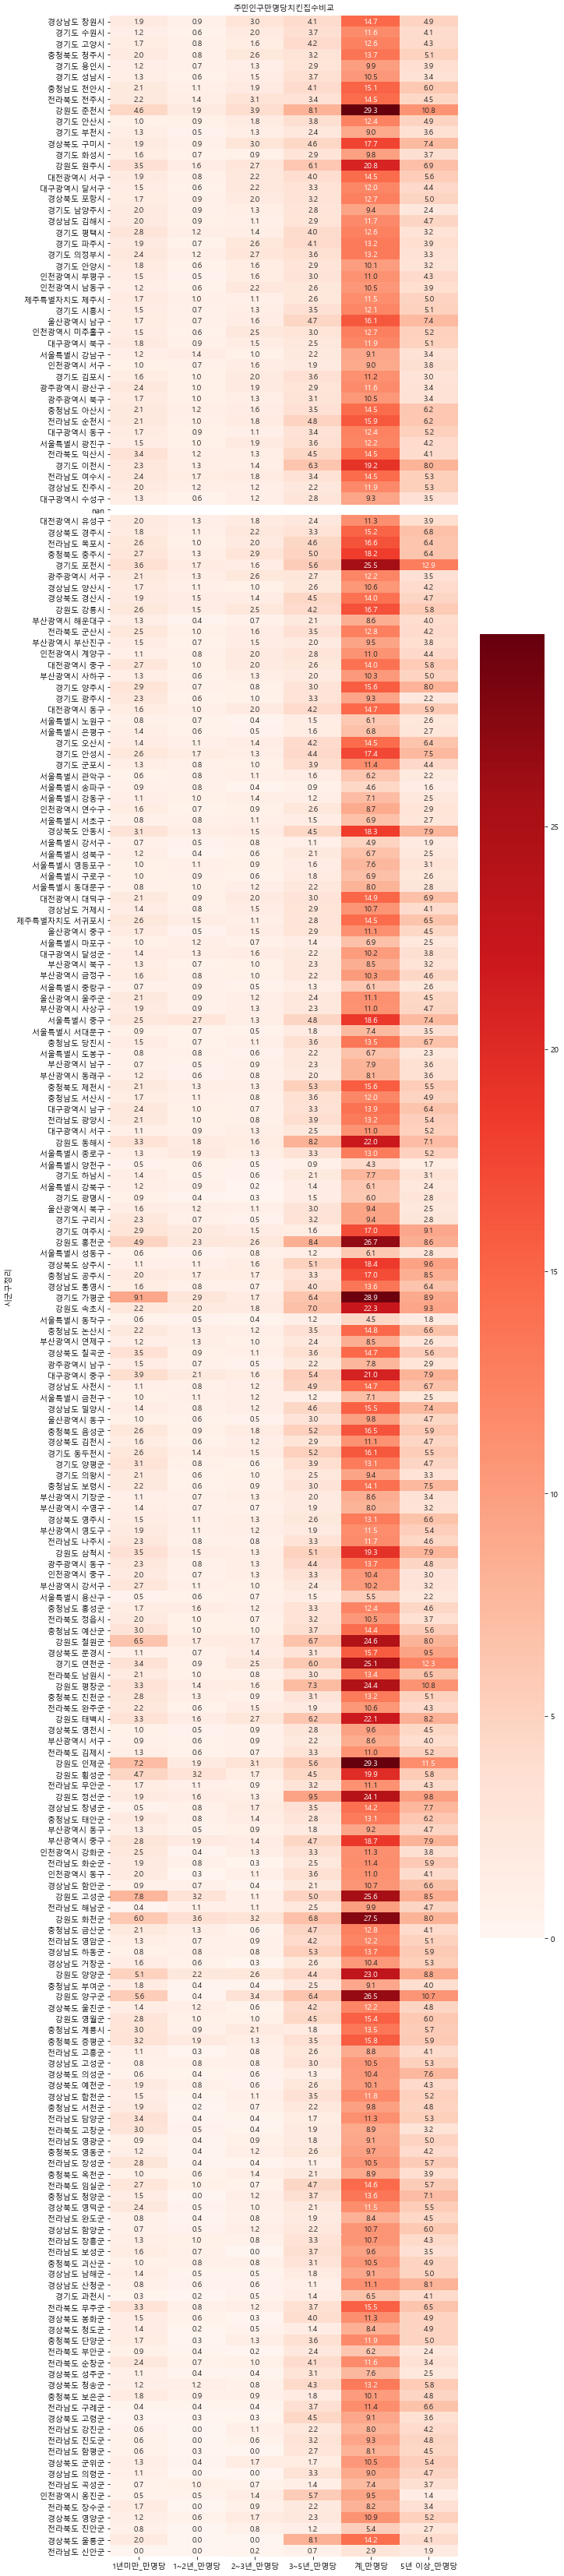

In [75]:
#그림 사이즈 조금 크게...

fig, ax = plt.subplots( figsize=(10,60) )

plt.title('주민인구만명당치킨집수비교', fontsize=10)

sns.heatmap(data = data_selected_graph, 
           cmap = 'Reds',
           annot = True, fmt = '.1f',
           )#annot실제값 표현 , annot true 일 때 fmt 로 설정가능 / #'RdBu'

fig.savefig('./img/주민인구만명당치킨집수.png')

In [72]:
data_selected_graph.sort_values(by = "계_만명당", ascending = False).head(30)

,1년미만_만명당,1~2년_만명당,2~3년_만명당,3~5년_만명당,계_만명당,5년 이상_만명당
시군구정리,,,,,,
강원도 춘천시,4.561003,1.888540,3.919612,8.124287,29.325827,10.832383
강원도 인제군,7.157082,1.867065,3.111775,5.601195,29.250685,11.513567
경기도 가평군,9.059411,2.860867,1.748307,6.357481,28.926539,8.900474
강원도 화천군,5.979908,3.587945,3.189284,6.777229,27.507575,7.973210
강원도 홍천군,4.860684,2.287381,2.573303,8.434717,26.733763,8.577678
강원도 양구군,5.553657,0.427204,3.417635,6.408066,26.486671,10.680109
강원도 고성군,7.816941,3.197840,1.065947,4.974417,25.582717,8.527572
경기도 포천시,3.583849,1.725557,1.592822,5.641243,25.485147,12.941676
경기도 연천군,3.360742,0.896198,2.464544,6.049336,25.093541,12.322721


In [ ]:
# 신입 / 이직 --> 프로젝트...포트폴리오